In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import xgboost as xgb
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.ensemble import RandomForestRegressor
from sklearn.inspection import partial_dependence, PartialDependenceDisplay
import shap

In [3]:
# Load dataset from UCI repository
dataset_url = "https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv"
df = pd.read_csv(dataset_url, delimiter=';')

# Display basic dataset info
display(df.head())

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [4]:
# Data preprocessing (Assuming target variable is 'quality')
X = df.drop(columns=['quality'])
y = df['quality']
# Splitting data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [5]:


# Train a simple model (Linear Regression)
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

# Print the linear regression equation
intercept = lin_reg.intercept_
coefficients = lin_reg.coef_
equation = "Quality = {:.2f}".format(intercept)
for feature, coef in zip(X.columns, coefficients):
    equation += " + ({:.2f} * {})".format(coef, feature)
print("Linear Regression Equation:")
print(equation)

Linear Regression Equation:
Quality = 14.36 + (0.02 * fixed acidity) + (-1.00 * volatile acidity) + (-0.14 * citric acid) + (0.01 * residual sugar) + (-1.81 * chlorides) + (0.01 * free sulfur dioxide) + (-0.00 * total sulfur dioxide) + (-10.35 * density) + (-0.39 * pH) + (0.84 * sulphates) + (0.28 * alcohol)


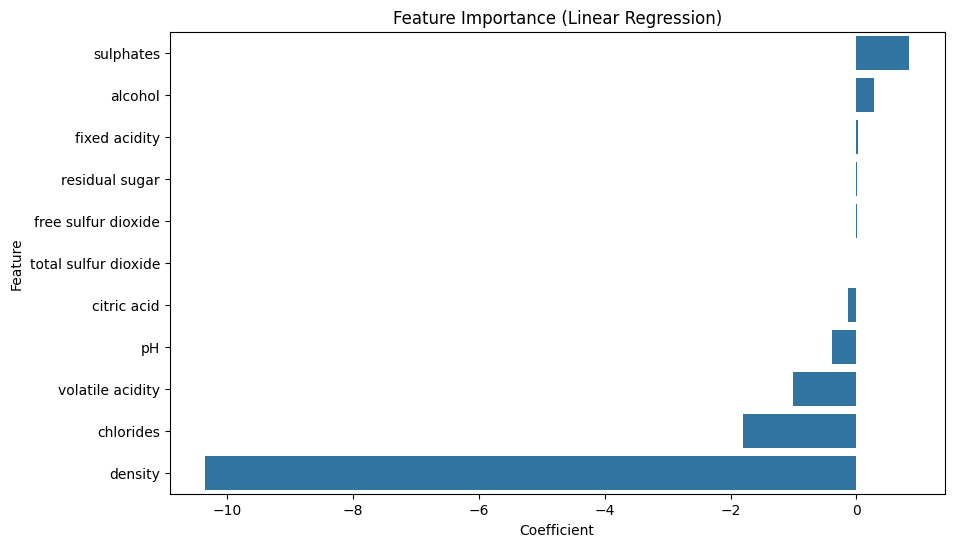

In [ ]:
# Feature importance via correlation
feature_importance = pd.DataFrame({'Feature': X.columns, 'Coefficient': lin_reg.coef_})
feature_importance = feature_importance.sort_values(by='Coefficient', ascending=False)

# Plot feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x='Coefficient', y='Feature', data=feature_importance)
plt.title('Feature Importance (Linear Regression)')
plt.show()

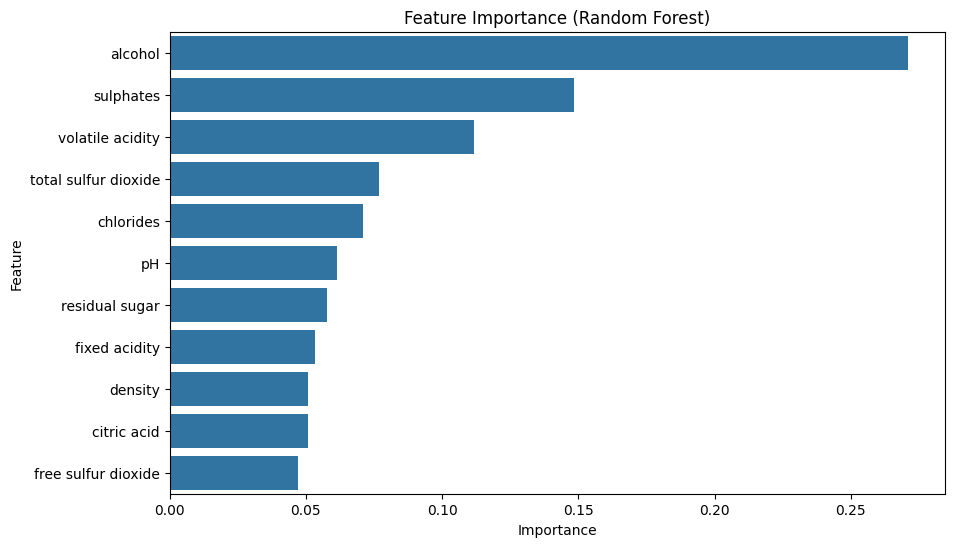


Partial Dependence Plot (PDP) helps us understand the relationship between a specific feature and the predicted target while keeping other features constant. It shows how the model's prediction changes as the feature's value varies.


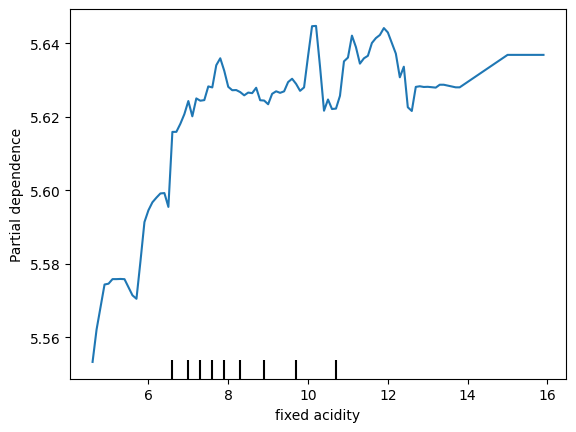

In [7]:
# Train a more complex model (Random Forest)
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Feature importance for complex model
importances = rf.feature_importances_
feature_importance_rf = pd.DataFrame({'Feature': X.columns, 'Importance': importances})
feature_importance_rf = feature_importance_rf.sort_values(by='Importance', ascending=False)

# Plot feature importance (Random Forest)
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_rf)
plt.title('Feature Importance (Random Forest)')
plt.show()

# Partial Dependence Plot for a single feature
print("\nPartial Dependence Plot (PDP) helps us understand the relationship between a specific feature and the predicted target while keeping other features constant. It shows how the model's prediction changes as the feature's value varies.")
feature_idx = 0  # Change this to visualize different features
PartialDependenceDisplay.from_estimator(rf, X_train, [feature_idx])
plt.show()

In [ ]:
# SHAP values for Random Forest
explainer = shap.Explainer(rf, X_train)
shap_values = explainer(X_test)

# SHAP summary plot
shap.summary_plot(shap_values, X_test)

### doing exercises

In [ ]:
# use random forest + linear regression

In [14]:
import kagglehub
import os
# Download latest version
path = kagglehub.dataset_download("robikscube/hourly-energy-consumption")

print("Path to dataset files:", path)

Path to dataset files: C:\Users\Bruger\.cache\kagglehub\datasets\robikscube\hourly-energy-consumption\versions\3


In [16]:
dataset_path = "C:/Users/Bruger/.cache/kagglehub/datasets/robikscube/hourly-energy-consumption/versions/3"

files = os.listdir(dataset_path)
print(files)

['AEP_hourly.csv', 'COMED_hourly.csv', 'DAYTON_hourly.csv', 'DEOK_hourly.csv', 'DOM_hourly.csv', 'DUQ_hourly.csv', 'EKPC_hourly.csv', 'est_hourly.paruqet', 'FE_hourly.csv', 'NI_hourly.csv', 'PJME_hourly.csv', 'PJMW_hourly.csv', 'pjm_hourly_est.csv', 'PJM_Load_hourly.csv']


In [17]:
file_path = "C:/Users/Bruger/.cache/kagglehub/datasets/robikscube/hourly-energy-consumption/versions/3/PJME_hourly.csv"

In [22]:
df = pd.read_csv(file_path)
df = df.set_index('Datetime')
df.index = pd.to_datetime(df.index)
df = df.sort_index()
df

,PJME_MW
Datetime,
2002-01-01 01:00:00,30393.0
2002-01-01 02:00:00,29265.0
2002-01-01 03:00:00,28357.0
2002-01-01 04:00:00,27899.0
2002-01-01 05:00:00,28057.0
...,...
2018-08-02 20:00:00,44057.0
2018-08-02 21:00:00,43256.0
2018-08-02 22:00:00,41552.0


In [35]:
train = df.loc[df.index < '01-01-2005']
test = df.loc[df.index >= '01-01-2005' and df.index < '01-01-2006']
plt.clf()
fig, ax = plt.subplots(figsize=(15, 5))
train.plot(ax=ax, label='Training Set', title='Data Train/Test Split')
test.plot(ax=ax, label='Test Set')
ax.axvline('01-01-2015', color='black', ls='--')
ax.legend(['Training Set', 'Test Set'])
plt.show()

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

In [36]:
def create_features(df):
    """
    Create time series features and lag features based on time series index.
    """
    df = df.copy()

    # Basic time-based features
    df['hour'] = df.index.hour
    df['dayofweek'] = df.index.dayofweek
    df['quarter'] = df.index.quarter
    df['month'] = df.index.month
    df['year'] = df.index.year
    df['dayofyear'] = df.index.dayofyear
    df['dayofmonth'] = df.index.day
    df['weekofyear'] = df.index.isocalendar().week

    # Lag features
    df['lag_1d'] = df['PJME_MW'].shift(1)   # 1 day lag
    df['lag_1w'] = df['PJME_MW'].shift(7)   # 1 week lag
    df['lag_1m'] = df['PJME_MW'].shift(30)  # 1 month lag (approx. 30 days)
    df['lag_1y'] = df['PJME_MW'].shift(365) # 1 year lag

    # Rolling statistics features
    df['rolling_mean_3d'] = df['PJME_MW'].rolling(window=3).mean()  # Last 3 days rolling mean
    df['rolling_mean_30d'] = df['PJME_MW'].rolling(window=30).mean()  # Last month rolling mean
    df['rolling_mean_same_month_last_year'] = df['PJME_MW'].shift(365).rolling(window=30).mean()  # Same month previous year rolling mean
    df['rolling_mean_same_week_last_year'] = df['PJME_MW'].shift(365).rolling(window=7).mean()  # Same week previous year rolling mean

    return df

df = create_features(df)

In [21]:
df

,PJME_MW,hour,dayofweek,quarter,month,year,dayofyear,dayofmonth,weekofyear,lag_1d,lag_1w,lag_1m,lag_1y,rolling_mean_3d,rolling_mean_30d,rolling_mean_same_month_last_year,rolling_mean_same_week_last_year
Datetime,,,,,,,,,,,,,,,,,
2002-01-01 01:00:00,30393.0,1,1,1,1,2002,1,1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2002-01-01 02:00:00,29265.0,2,1,1,1,2002,1,1,1,30393.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2002-01-01 03:00:00,28357.0,3,1,1,1,2002,1,1,1,29265.0,NaN,NaN,NaN,29338.333333,NaN,NaN,NaN
2002-01-01 04:00:00,27899.0,4,1,1,1,2002,1,1,1,28357.0,NaN,NaN,NaN,28507.000000,NaN,NaN,NaN
2002-01-01 05:00:00,28057.0,5,1,1,1,2002,1,1,1,27899.0,NaN,NaN,NaN,28104.333333,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-08-02 20:00:00,44057.0,20,3,3,8,2018,214,2,31,45641.0,45372.0,45313.0,42771.0,45486.000000,41515.666667,38934.233333,38711.142857
2018-08-02 21:00:00,43256.0,21,3,3,8,2018,214,2,31,44057.0,46534.0,46430.0,43742.0,44318.000000,41409.866667,38948.666667,40083.428571
2018-08-02 22:00:00,41552.0,22,3,3,8,2018,214,2,31,43256.0,47154.0,47867.0,44607.0,42955.000000,41199.366667,38906.000000,41346.428571


In [37]:
train = create_features(train)
test = create_features(test)

FEATURES_LR = [
    'hour', 'dayofweek', 'quarter', 'month', 'year', 'dayofyear', 'dayofmonth', 'weekofyear',
    ]
TARGET = 'PJME_MW'


FEATURES_XGB = [
    'hour', 'dayofweek', 'quarter', 'month', 'year', 'dayofyear', 'dayofmonth', 'weekofyear',
    'lag_1d', 'lag_1w', 'lag_1m', 'lag_1y',
    'rolling_mean_3d', 'rolling_mean_30d', 'rolling_mean_same_month_last_year', 'rolling_mean_same_week_last_year'
]

In [38]:
# Linear Regression Data
X_train_lr = train[FEATURES_LR]
y_train_lr = train[TARGET]

X_test_lr = test[FEATURES_LR]
y_test_lr = test[TARGET]

# XGBoost Data
X_train_xgb = train[FEATURES_XGB]
y_train_xgb = train[TARGET]

X_test_xgb = test[FEATURES_XGB]
y_test_xgb = test[TARGET]

In [39]:
# Initialize the Linear Regression model
lr = LinearRegression()

# Train the model
lr.fit(X_train_lr, y_train_lr)

# Make predictions
y_pred_lr = lr.predict(X_test_lr)

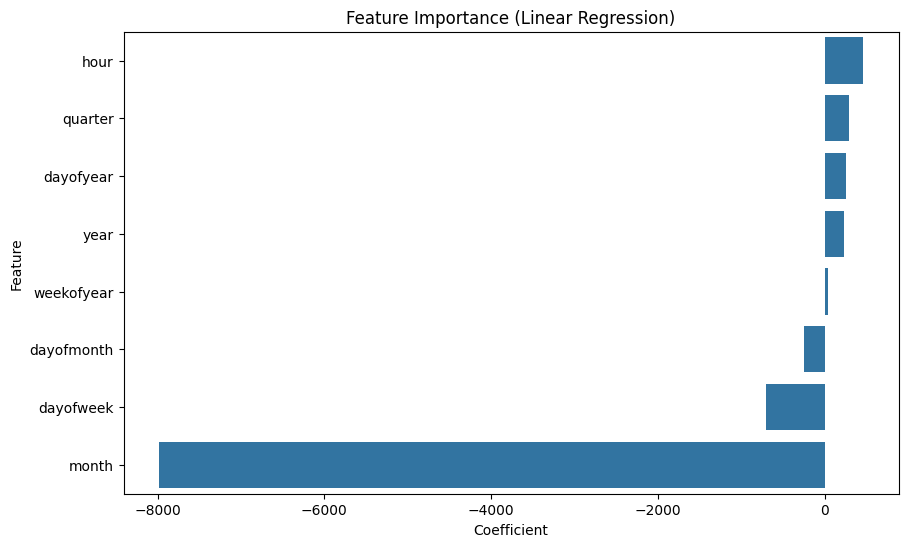

In [40]:
# Feature importance via correlation
feature_importance = pd.DataFrame({'Feature': X_train_lr.columns, 'Coefficient': lr.coef_})
feature_importance = feature_importance.sort_values(by='Coefficient', ascending=False)

# Plot feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x='Coefficient', y='Feature', data=feature_importance)
plt.title('Feature Importance (Linear Regression)')
plt.show()

In [41]:
X_train_lr

,hour,dayofweek,quarter,month,year,dayofyear,dayofmonth,weekofyear
Datetime,,,,,,,,
2002-01-01 01:00:00,1,1,1,1,2002,1,1,1
2002-01-01 02:00:00,2,1,1,1,2002,1,1,1
2002-01-01 03:00:00,3,1,1,1,2002,1,1,1
2002-01-01 04:00:00,4,1,1,1,2002,1,1,1
2002-01-01 05:00:00,5,1,1,1,2002,1,1,1
...,...,...,...,...,...,...,...,...
2004-12-31 19:00:00,19,4,4,12,2004,366,31,53
2004-12-31 20:00:00,20,4,4,12,2004,366,31,53
2004-12-31 21:00:00,21,4,4,12,2004,366,31,53


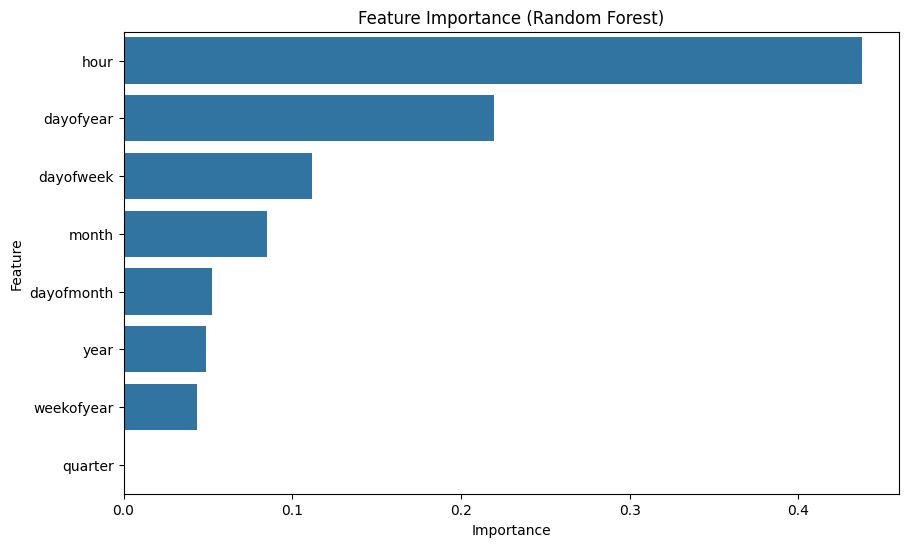


Partial Dependence Plot (PDP) helps us understand the relationship between a specific feature and the predicted target while keeping other features constant. It shows how the model's prediction changes as the feature's value varies.


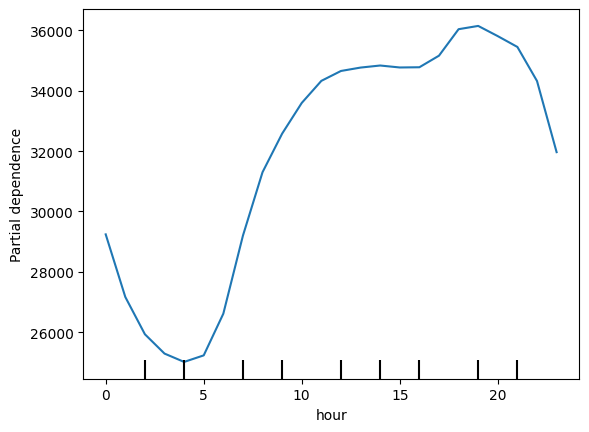

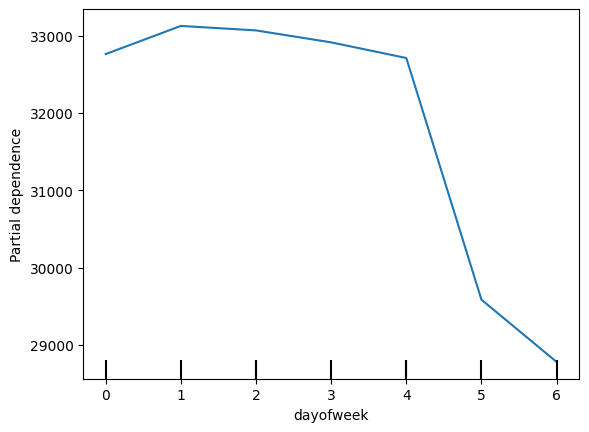

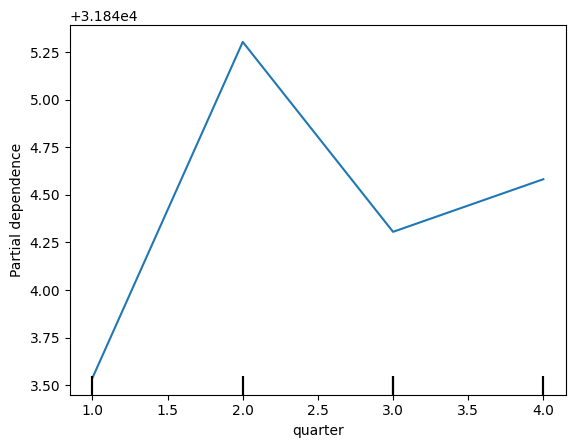

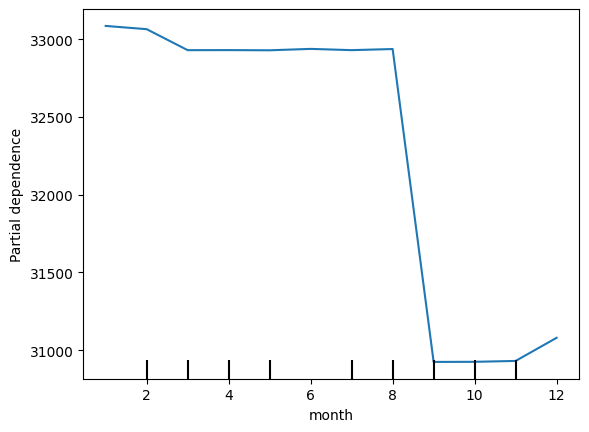

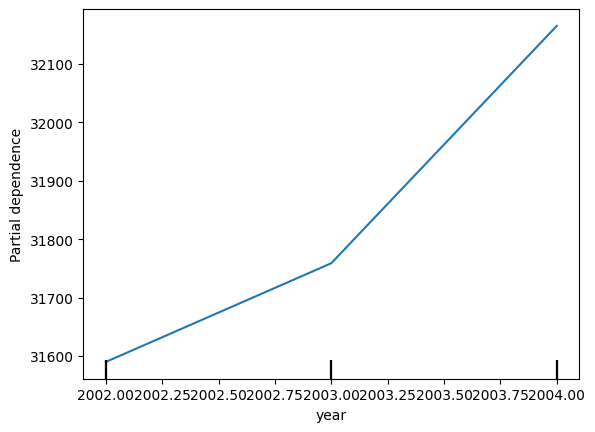

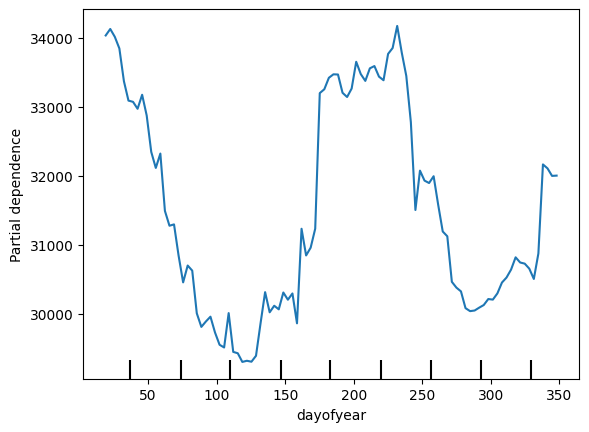

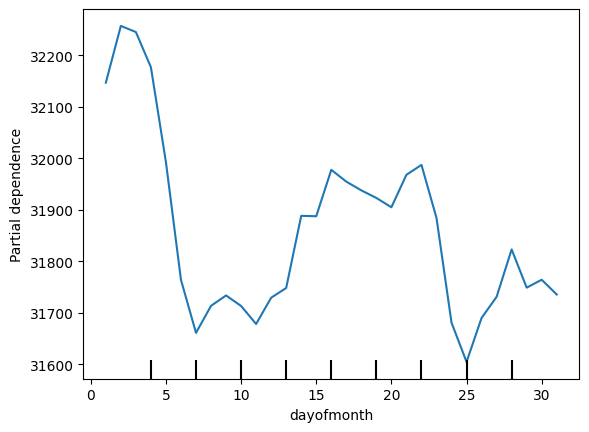

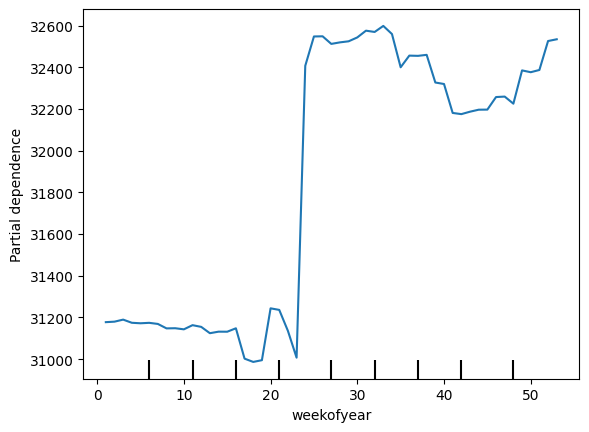

In [42]:
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train_lr, y_train_lr)

# Feature importance for complex model
importances = rf.feature_importances_
feature_importance_rf = pd.DataFrame({'Feature': X_train_lr.columns, 'Importance': importances})
feature_importance_rf = feature_importance_rf.sort_values(by='Importance', ascending=False)

# Plot feature importance (Random Forest)
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_rf)
plt.title('Feature Importance (Random Forest)')
plt.show()

# Partial Dependence Plot for a single feature
print("\nPartial Dependence Plot (PDP) helps us understand the relationship between a specific feature and the predicted target while keeping other features constant. It shows how the model's prediction changes as the feature's value varies.")
feature_idx = 0  # Change this to visualize different features

for _index in X_train_lr.columns:
    PartialDependenceDisplay.from_estimator(rf, X_train_lr, [_index])
    plt.show()

In [ ]:
# train with xgboost, and 

In [ ]:
# Train an XGBoost model
xgb_model = xgb.XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
xgb_model.fit(X_train_lr, y_train_lr)

# Train a simple neural network
model = keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=(X_train_lr.shape[1],)),
    layers.Dense(32, activation='relu'),
    layers.Dense(1)  # Regression output layer
])

model.compile(optimizer='adam', loss='mse')#WOOORKRKRRKR, why can't you just wokr, you piece of ***, i hate you
model.fit(X_train_lr, y_train_lr, epochs=50, batch_size=16, verbose=1)

ValueError: Invalid dtype: UInt32

In [ ]:
#use shap and lime on xgboost